### Importing Relevant Packages

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [3]:
"""
A simple Stress test on Pandemic reovery Index using ARIMA 
Author : Babak.Ea
Date   : 2020-12-09
Target : ARIMA stress test on Recovery curves 

"""

###############################

from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime
plt.style.use('ggplot')
import pandas as pd
from pandas.io.json import json_normalize 
import numpy as np
import statsmodels
import datetime
import urllib, json
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima
import sys
import warnings
import ipywidgets as widgets
from IPython.display import display

import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

from math import sqrt
from sklearn.metrics import mean_squared_error

if not sys.warnoptions:
    warnings.simplefilter("ignore")


### Loading and Transforming the Data

In [4]:
URL="../../data/Index2018.csv"
raw_csv_data = pd.read_csv("../../data/Index2018.csv") 
"""df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')"""
raw_csv_data

date          spx       dax         ftse    nikkei
0     07/01/1994   469.900000   2224.95  3445.980000  18124.01
1     10/01/1994   475.270000   2225.00  3440.580000  18443.44
2     11/01/1994   474.130000   2228.10  3413.770000  18485.25
3     12/01/1994   474.170000   2182.06  3372.020000  18793.88
4     13/01/1994   472.470000   2142.37  3360.010000  18577.26
...          ...          ...       ...          ...       ...
6264  23/01/2018  2839.130362  13559.60  7731.827774  24124.15
6265  24/01/2018  2837.544008  13414.74  7643.428966  23940.78
6266  25/01/2018  2839.253031  13298.36  7615.839954  23669.49
6267  26/01/2018  2872.867839  13340.17  7665.541292  23631.88
6268  29/01/2018  2853.528411  13324.48  7671.533300  23629.34

[6269 rows x 5 columns]

In [5]:
class Data_reader:
    def __init__(self,URL,mcc_group="mcc_group",date="Date",Actual="act_cred_vol_am",predicted="prediction",
                 portfolio_type="portfolio_type",Recovery_index="Recovery_index",port_folio="National"):
        self.URL=URL
        #self.Mcc=mcc_group
        
        self.date=date
        #self.Actual=Actual
        #self.predicted=predicted
        #self.portfolio_type=portfolio_type
        #self.Recovery_index=Recovery_index
        #self.port_folio=port_folio

        self.DF_reader()
        #self.MA()
        
    def DF_reader(self):# input Json URL, Output: Json Data
        self.df =pd.read_csv(self.URL)
        self.df[self.date] = pd.to_datetime(self.df[self.date], infer_datetime_format=True,format='%Y-%m-%d')
        """self.df[self.date]= self.df[self.date].apply(lambda x: 
                                    dt.datetime.strptime(x,'%y%b%Y'))"""
        self.df.set_index(self.date, inplace=True)
        self.df=self.df.asfreq('b') # remove weekends
        self.df=self.df.fillna(method='ffill')# forward fill 
        
        #self.mcc_group=self.df[self.Mcc].unique().tolist()
        #self.df=self.df[self.df[self.portfolio_type]==self.port_folio]


In [18]:
df= Data_reader(URL,date="date").df

In [19]:
df

spx       dax         ftse    nikkei
date                                                    
1994-07-01   469.900000   2224.95  3445.980000  18124.01
1994-07-04   450.880000   2184.89  3129.000000  19890.98
1994-07-05   450.880000   2184.89  3129.000000  19890.98
1994-07-06   458.210000   2131.80  3004.800000  21042.71
1994-07-07   448.380000   2049.10  2964.400000  20620.02
...                 ...       ...          ...       ...
2018-01-23  2839.130362  13559.60  7731.827774  24124.15
2018-01-24  2837.544008  13414.74  7643.428966  23940.78
2018-01-25  2839.253031  13298.36  7615.839954  23669.49
2018-01-26  2872.867839  13340.17  7665.541292  23631.88
2018-01-29  2853.528411  13324.48  7671.533300  23629.34

[6152 rows x 4 columns]

In [8]:
tem=df.index.max()

In [9]:
tem.strftime("%Y-%m-%d")

'2018-01-29'

In [10]:
pd.Timestamp(tem.strftime("%Y-%m-%d")) - pd.Timedelta(30,unit="d")

Timestamp('2017-12-30 00:00:00')

In [11]:
#help(pd.Timedelta)

In [12]:
Loc_date=pd.Timestamp(tem.strftime("%Y-%m-%d")) - pd.Timedelta('30 days')
print(Loc_date.strftime("%Y-%m-%d"))

print(df.loc[(df.index > Loc_date.strftime("%Y-%m-%d"))])

2017-12-30
                    spx       dax         ftse    nikkei
date                                                    
2018-01-01  2673.610523  12917.64  7687.772698  22764.94
2018-01-02  2673.610523  12917.64  7687.772698  22764.94
2018-01-03  2673.610523  12917.64  7687.772698  22764.94
2018-01-04  2673.610523  12917.64  7687.772698  22764.94
2018-01-05  2673.610523  12917.64  7687.772698  22764.94
2018-01-08  2673.610523  12917.64  7687.772698  22764.94
2018-01-09  2673.610523  12917.64  7687.772698  22764.94
2018-01-10  2673.610523  12917.64  7687.772698  22764.94
2018-01-11  2673.610523  12917.64  7687.772698  22764.94
2018-01-12  2673.610523  12917.64  7687.772698  22764.94
2018-01-15  2786.244143  13200.51  7769.139189  23714.88
2018-01-16  2776.420024  13246.33  7755.931441  23951.81
2018-01-17  2802.555574  13183.96  7725.432076  23868.34
2018-01-18  2798.030257  13281.43  7700.963484  23763.37
2018-01-19  2810.302683  13434.45  7730.787919  23808.06
2018-01-22  2832.974

In [24]:
def period_time(df,col="spx",date="Date",END_DATE="Max",START_DATE="min"):
    date_list=[]
    if END_DATE=="Max":
        Max=df.index.max().strftime("%Y-%m-%d")
    
    #LAG_COL=[col+"_"+str(x) for x in range (0,50)]
    for i in range(1,50):
        df["Col_{}".format(i)]=df["spx"].shift(i)
        
    return df[50:]
    
        
        
        
        

SyntaxError: invalid syntax (<ipython-input-24-93d93e5a1eac>, line 7)

In [23]:
#LAG_COL=["col"+"_"+str(x) for x in range (0,50)]
#LAG_COL

for i in range(1,50):
    df["Col_{}".format(i)]=df["spx"].shift(i)
df[50:]

spx       dax         ftse    nikkei        Col_1  \
date                                                                    
1994-09-09   468.180000   2155.58  3139.300000  19897.88   457.930000   
1994-09-12   446.960000   2024.19  2977.300000  18978.30   468.180000   
1994-09-13   467.510000   2157.15  3121.400000  20046.11   446.960000   
1994-09-14   468.800000   2118.08  3079.800000  19919.38   467.510000   
1994-09-15   474.810000   2129.36  3112.700000  19919.38   468.800000   
...                 ...       ...          ...       ...          ...   
2018-01-23  2839.130362  13559.60  7731.827774  24124.15  2832.974100   
2018-01-24  2837.544008  13414.74  7643.428966  23940.78  2839.130362   
2018-01-25  2839.253031  13298.36  7615.839954  23669.49  2837.544008   
2018-01-26  2872.867839  13340.17  7665.541292  23631.88  2839.253031   
2018-01-29  2853.528411  13324.48  7671.533300  23629.34  2872.867839   

                  Col_2        Col_3        Col_4        Col_5        Col_6  \
date                                                                          
1994-09-09   457.860000   457.860000   442.320000   472.770000   475.490000   
1994-09-12   457.930000   457.860000   457.860000   442.320000   472.770000   
1994-09-13   468.180000   457.930000   457.860000   457.860000   442.320000   
1994-09-14   446.960000   468.180000   457.930000   457.860000   457.860000   
1994-09-15   467.510000   446.960000   468.180000   457.930000   457.860000   
...                 ...          ...          ...          ...          ...   
2018-01-23  2810.302683  2798.030257  2802.555574  2776.420024  2786.244143   
2018-01-24  2832.974100  2810.302683  2798.030257  2802.555574  2776.420024   
2018-01-25  2839.130362  2832.974100  2810.302683  2798.030257  2802.555574   
2018-01-26  2837.544008  2839.130362  2832.974100  2810.302683  2798.030257   
2018-01-29  2839.253031  2837.544008  2839.130362  2832.974100  2810.302683   

            ...       Col_40       Col_41       Col_42       Col_43  \
date        ...                                                       
1994-09-09  ...   454.160000   453.410000   448.730000   451.230000   
1994-09-12  ...   455.220000   454.160000   453.410000   448.730000   
1994-09-13  ...   453.860000   455.220000   454.160000   453.410000   
1994-09-14  ...   451.600000   453.860000   455.220000   454.160000   
1994-09-15  ...   452.610000   451.600000   453.860000   455.220000   
...         ...          ...          ...          ...          ...   
2018-01-23  ...  2627.044025  2601.423891  2602.424708  2597.077203   
2018-01-24  ...  2626.066195  2627.044025  2601.423891  2602.424708   
2018-01-25  ...  2647.579927  2626.066195  2627.044025  2601.423891   
2018-01-26  ...  2270.442867  2647.579927  2626.066195  2627.044025   
2018-01-29  ...  2344.926332  2270.442867  2647.579927  2626.066195   

                 Col_44       Col_45       Col_46       Col_47       Col_48  \
date                                                                          
1994-09-09   463.070000   448.380000   448.380000   458.210000   450.880000   
1994-09-12   451.230000   463.070000   448.380000   448.380000   458.210000   
1994-09-13   448.730000   451.230000   463.070000   448.380000   448.380000   
1994-09-14   453.410000   448.730000   451.230000   463.070000   448.380000   
1994-09-15   454.160000   453.410000   448.730000   451.230000   463.070000   
...                 ...          ...          ...          ...          ...   
2018-01-23  2597.077203  2599.029193  2582.141589  2578.854324  2585.643164   
2018-01-24  2597.077203  2597.077203  2599.029193  2582.141589  2578.854324   
2018-01-25  2602.424708  2597.077203  2597.077203  2599.029193  2582.141589   
2018-01-26  2601.423891  2602.424708  2597.077203  2597.077203  2599.029193   
2018-01-29  2627.044025  2601.423891  2602.424708  2597.077203  2597.077203   

                 Col_49  
date                     
1994-09-09   450.880000  
1994-09-12  



### Removing Surplus Data

In [8]:
df_comp['market_value']=df_comp.spx

In [9]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

A time series may be white noise.

A time series is a white noise if the variables are independent and identically distributed with a mean of zero.

This means that all variables have the same variance (sigma^2), and each value has a zero correlation with all other values in the series.

If the series's variables are drawn from a Gaussian distribution, the series is called Gaussian white noise.


<b>Predictability: </b>If your time series is white noise, then, by definition, it is random. You cannot reasonably model it and make predictions.

<b>Model Diagnostics: </b>The series of errors from a time series forecast model should ideally be white noise.


A time-series  {wt}
 is a discrete white noise series (DWN) if the  w1,w2,…,wt
 are independent and identically distributed (IID) with a mean of zero. For most of the examples in this course, we will assume that the wt∼N(0,q) , and therefore we refer to the time series   {wt} as Gaussian white noise. 


The pattern in the past will appear in the future, which means no pattern can be discovered.

A white noise timeserise has 3 charactristics:

<li> A constent mean ==tend to zero </li>
<li> A constent varians </li>
<li> No aitocorrelation </li>



Autocorralation : p=corr(xt,xt-1) # how each date vakue is related to the previouse date value
No autoCorrelation: means there is NO clear relationship between past, present and future values

Indeed: white noise is a series of random data.

In [10]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [11]:
df['wn'] = wn

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df.describe()

market_value           wn
count   5021.000000  5021.000000
mean    1091.651926  1083.763092
std      292.559287   291.133885
min      438.920000   -24.595122
25%      914.620000   888.421254
50%     1144.650000  1088.810181
75%     1316.280729  1283.044905
max     1570.252238  2105.769469

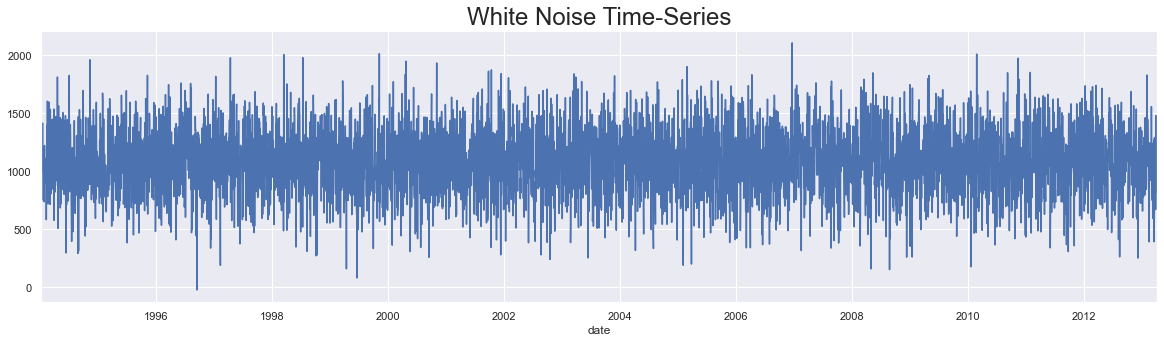

In [14]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

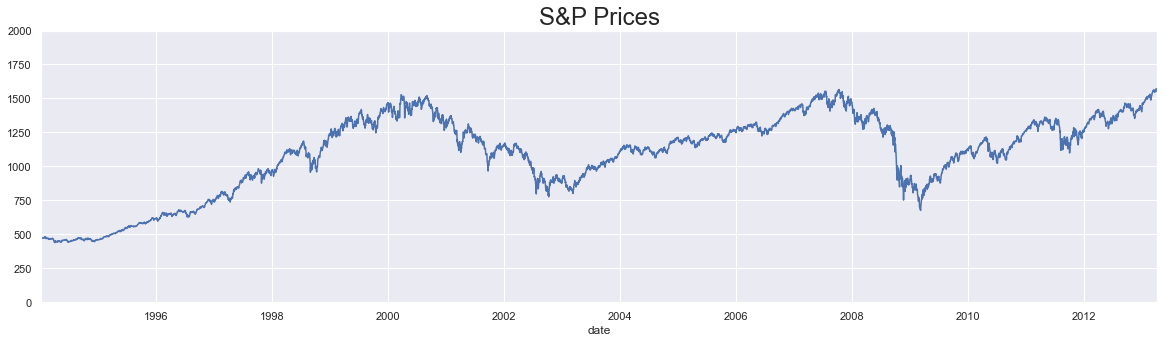

In [15]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2000)
plt.show()

### Random Walk

<b>Random walk :</b> A special type of time-series, where values tend to persist over time and differences between periodes are simply a white noise

Like if prise is P and noise or error is e then : 
Pt=Pt-1 + et


In [16]:
rw = pd.read_csv("../../data/RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [38]:
rw.describe()

price
count  5021.000000
mean   1269.944293
std     444.216793
min     585.483034
25%     931.550429
50%    1156.363045
75%    1488.362029
max    2715.508720

In [17]:
df['rw'] = rw.price

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df.head()

market_value           wn           rw
date                                              
1994-01-07        469.90  1311.725434  1122.139662
1994-01-10        475.27   767.666499  1080.347860
1994-01-11        474.13   749.833193  1082.095245
1994-01-12        474.17   749.571178  1083.639265
1994-01-13        472.47  1109.341033  1067.146255

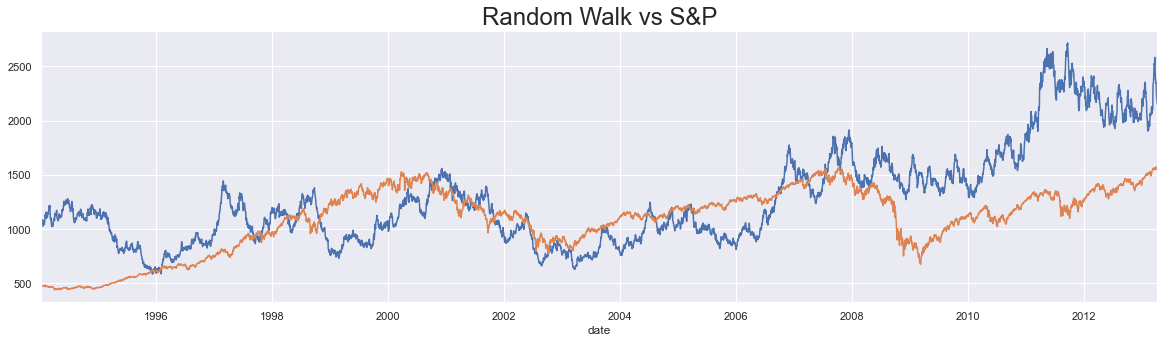

In [19]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

### Stationarity

In [20]:
sts.adfuller(df.market_value)

(-1.7369847452352427,
 0.4121645696770626,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [21]:
sts.adfuller(df.wn)

(-70.18069030431074,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70772.28468311849)

In [23]:
sts.adfuller(df.rw)

(-1.328607392768972,
 0.6159849181617384,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

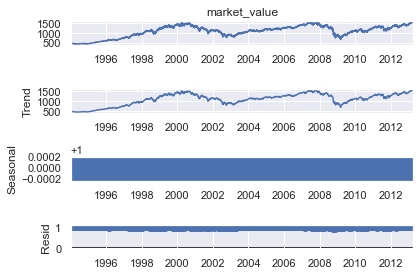

In [24]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

In [25]:
s_dec_multiplicative.trend

date
1994-01-07            NaN
1994-01-10            NaN
1994-01-11     473.188000
1994-01-12     474.190000
1994-01-13     473.796000
                 ...     
2013-04-01    1564.896959
2013-04-02    1563.055648
2013-04-03    1559.874260
2013-04-04            NaN
2013-04-05            NaN
Freq: B, Name: trend, Length: 5021, dtype: float64

In [26]:
s_dec_multiplicative.observed

date
1994-01-07     469.900000
1994-01-10     475.270000
1994-01-11     474.130000
1994-01-12     474.170000
1994-01-13     472.470000
                 ...     
2013-04-01    1562.173837
2013-04-02    1570.252238
2013-04-03    1553.686978
2013-04-04    1559.979316
2013-04-05    1553.278930
Freq: B, Name: market_value, Length: 5021, dtype: float64

### ACF

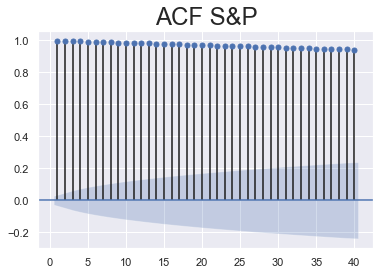

In [29]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

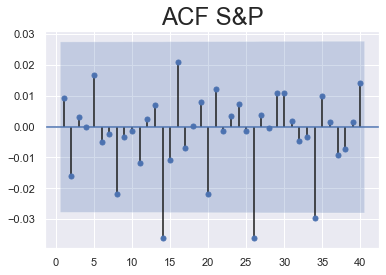

In [28]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

### PACF

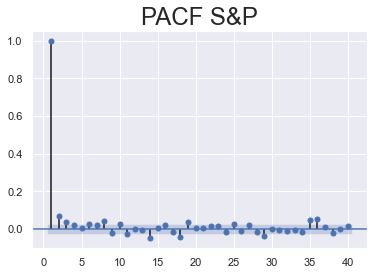

In [25]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

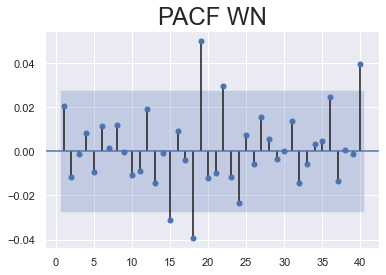

In [26]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()